# 📘 Fine-tuned DeepSeek-OCR Evaluation & Analysis

## 1. Installation

In [ ]:
# 1. Cài đặt Unsloth & Dependencies
!pip install -q --no-deps bitsandbytes accelerate xformers peft trl triton cut_cross_entropy unsloth_zoo
!pip install -q sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" "hf_transfer"
!pip install -q --no-deps unsloth

# 2. Cài đặt Transformers & TRL đúng version yêu cầu
!pip install -q transformers==4.56.2
!pip install -q --no-deps trl==0.22.2

# 3. Thư viện hỗ trợ
!pip install -q jiwer einops addict easydict torchvision

In [2]:
import os
os.environ["UNSLOTH_WARN_UNINITIALIZED"] = '0'
# Ép buộc chỉ sử dụng 1 GPU 
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

## 2. Load fine-tuned model

In [3]:
# Đường dẫn model fine-tuned
FINETUNED_PATH = "/kaggle/input/deepseek-ocr-finetuning-uit-hwdb/fine_tuned_deepseek_ocr/"

In [4]:
import torch
from unsloth import FastVisionModel
from transformers import AutoModel
from peft import PeftModel
from huggingface_hub import snapshot_download 

print("🚀 Bắt đầu quy trình Load Model...")

# BƯỚC 1: Tải/Kiểm tra Model base
print("⬇️ Đang kiểm tra/tải Base Model...")
base_model_path = snapshot_download("unsloth/DeepSeek-OCR", local_dir="deepseek_ocr_base")

# BƯỚC 2: Load Base Model
print("🔄 Đang load Base Model vào VRAM...")
base_model, tokenizer = FastVisionModel.from_pretrained(
    "./deepseek_ocr_base", # Load từ folder base vừa tải
    load_in_4bit = True,
    auto_model = AutoModel,
    trust_remote_code = True,
    unsloth_force_compile = True,
    use_gradient_checkpointing = "unsloth",
    device_map = "cuda:0", 
)

# BƯỚC 3: Gắn Adapter LoRA
if os.path.exists(FINETUNED_PATH):
    print(f"🔄 Đang gắn LoRA Adapter từ: {FINETUNED_PATH}")
    try:
        # Load adapter đè lên base model
        model = PeftModel.from_pretrained(base_model, FINETUNED_PATH)
        
        # Chuyển sang chế độ Inference
        FastVisionModel.for_inference(model)
        print("✅ Đã load Model Fine-tuned thành công! Sẵn sàng sử dụng.")
        
    except Exception as e:
        print(f"❌ Lỗi khi gắn Adapter: {e}")
else:
    print(f"❌ Không tìm thấy đường dẫn: {FINETUNED_PATH}")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


2025-12-11 06:51:26.367690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765435886.603357      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765435886.671823      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🦥 Unsloth Zoo will now patch everything to make training faster!
Unsloth: Could not import trl.trainer.alignprop_trainer: Failed to import trl.trainer.alignprop_trainer because of the following error (look up to see its traceback):
Failed to import trl.models.modeling_sd_base because of the following error (look up to see its traceback):
Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion because of the following error (look up to see its traceback):
Failed to import diffusers.loaders.ip_adapter because of the following error (look up to see its traceback):
Current Torch with Flash-Attention 2.5.7 doesnt have a compatible aten::_flash_attention_forward schema
EXPECTED:
aten::_flash_attention_forward(Tensor query, Tensor key, Tensor value, Tensor? cum_seq_q, Tensor? cum_seq_k, SymInt max_q, SymInt max_k, float dropout_p, bool is_causal, bool return_debug_mask, *, float? scale=None, SymInt? window_size_left=None, SymInt? window_size_right=None, Tensor? seqused

[unsloth_zoo.log|WARNING]Unsloth: Failed to import trl openenv: No module named 'trl.experimental'


🚀 Bắt đầu quy trình Load Model...
⬇️ Đang kiểm tra/tải Base Model...


.gitattributes: 0.00B [00:00, ?B/s]

README-checkpoint.md: 0.00B [00:00, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

assets/fig1.png:   0%|          | 0.00/396k [00:00<?, ?B/s]

assets/show1.jpg:   0%|          | 0.00/117k [00:00<?, ?B/s]

assets/show2.jpg:   0%|          | 0.00/216k [00:00<?, ?B/s]

assets/show3.jpg:   0%|          | 0.00/247k [00:00<?, ?B/s]

assets/show4.jpg:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

conversation.py: 0.00B [00:00, ?B/s]

deepencoder.py: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

processor_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


🔄 Đang load Base Model vào VRAM...
Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2025.12.4: Fast Deepseekocr patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at ./deepseek_ocr_base and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🔄 Đang gắn LoRA Adapter từ: /kaggle/input/deepseek-ocr-finetuning-uit-hwdb/fine_tuned_deepseek_ocr/
✅ Đã load Model Fine-tuned thành công! Sẵn sàng sử dụng.


## 3. Metrics & Inference

In [5]:
import json
import jiwer
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import shutil

# Tạo thư mục tạm để model lưu kết quả debug 
OUTPUT_DIR = "/kaggle/working/eval_output"
if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
os.makedirs(OUTPUT_DIR, exist_ok=True)

def calculate_cer(reference, hypothesis):
    """
    Tính Character Error Rate (CER) với chuẩn hóa văn bản
    """
    # 1. Chuẩn hóa dữ liệu 
    # Strip: xoá khoảng trắng thừa đầu cuối
    # Lower: đưa về chữ thường 
    ref = reference.strip().lower()
    hyp = hypothesis.strip().lower()
    
    # 2. Xử lý các trường hợp đặc biệt
    if not ref:
        if not hyp:
            return 0.0  # Cả 2 cùng rỗng -> Model đoán đúng -> Lỗi 0%
        else:
            return 1.0  # Nhãn rỗng nhưng Model đoán ra chữ -> 100%
            
    # 3. Tính CER
    return jiwer.cer(ref, hyp)

def evaluate_dataset(jsonl_path, max_samples=None):
    print(f"📂 Đang đánh giá trên tập: {jsonl_path}")
    
    results = []
    total_cer = 0
    count = 0
    
    instruction = "<image>\nFree OCR. "
    
    # Đọc dữ liệu
    with open(jsonl_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    # Nếu muốn test nhanh thì giới hạn số mẫu
    if max_samples:
        lines = lines[:max_samples]
        
    print(f"🚀 Bắt đầu chạy Inference trên {len(lines)} mẫu...")
    
    for line in tqdm(lines):
        item = json.loads(line)
        img_path = item['image']
        # folder name
        img_folder = os.path.basename(os.path.dirname(img_path))
        # img file name
        img_name = os.path.basename(img_path)
        ground_truth = item['text']
        
        # Bỏ qua nếu ảnh không tồn tại
        if not os.path.exists(img_path): continue
        
        try:
            # Chạy model
            res = model.infer(
                tokenizer,
                prompt=instruction,
                image_file=img_path,
                output_path=OUTPUT_DIR + f"/{img_folder}/{img_name}/", 
                base_size=1024,
                image_size=640,
                crop_mode=True,
                save_results=True,
                test_compress=False
            )
            
            # Lấy text dự đoán
            prediction = ""
            with open(OUTPUT_DIR + f"/{img_folder}/{img_name}/result.mmd", 'r', encoding='utf-8') as f:
                for line in f:
                    prediction = line.strip()
                    break
                    
            
            # Tính CER
            cer = calculate_cer(ground_truth, prediction)
            total_cer += cer
            count += 1
            
            # Lưu kết quả để phân tích sau
            results.append({
                "image": img_path,
                "ground_truth": ground_truth,
                "prediction": prediction,
                "cer": cer
            })
            
        except Exception as e:
            print(f"⚠️ Lỗi mẫu {img_path}: {e}")
            
    # Tổng hợp
    avg_cer = total_cer / count if count > 0 else 0
    
    return pd.DataFrame(results), avg_cer, count

print("✅ Đã chuẩn bị hàm đánh giá")

✅ Đã chuẩn bị hàm đánh giá


### Run evaluation

In [ ]:
# Đường dẫn file Test 
TEST_FILE = "/kaggle/input/uit-hwdb/test_line.jsonl"

# Chạy đánh giá 
df_results = None
avg_cer = 0
count = 0
if os.path.exists(TEST_FILE):
    df_results, avg_cer, count = evaluate_dataset(TEST_FILE, max_samples=None) 
    
    # Lưu kết quả ra CSV để làm báo cáo
    df_results.to_csv("evaluation_results.csv", index=False)
    print("💾 Đã lưu bảng kết quả chi tiết vào 'evaluation_results.csv'")
else:
    print(f"⚠️ Không tìm thấy file {TEST_FILE}")

## 4. Results 

### 4.1 Summary 

In [7]:
# Hiển thị kết quả tổng hợp
print(f"\n{'='*40}")
print(f"📊 KẾT QUẢ ĐÁNH GIÁ (Trên {count} mẫu)")
print(f"🎯 Average CER: {avg_cer:.4f} (Thấp hơn là tốt hơn)")
print(f"   - Tức là sai khoảng {avg_cer*100:.2f}% số ký tự")
print(f"{'='*40}\n")


📊 KẾT QUẢ ĐÁNH GIÁ (Trên 201 mẫu)
🎯 Average CER: 0.1157 (Thấp hơn là tốt hơn)
   - Tức là sai khoảng 11.57% số ký tự



### 4.2 Visualization

In [8]:
def visualize_results(df, num_show=3, worst=False):
    """Hiển thị các mẫu tốt nhất hoặc tệ nhất"""
    # Sắp xếp theo CER
    sorted_df = df.sort_values(by="cer", ascending=not worst) # worst=True -> giảm dần (CER cao ở đầu)
    
    top_samples = sorted_df.head(num_show)
    
    # add icon to print
    if worst:
        print(f"----- 🚨 Top {num_show} mẫu tệ nhất (CER cao nhất) -----")
    else:
        print(f"----- 🌟 Top {num_show} mẫu tốt nhất (CER thấp nhất) -----")
    
    for idx, row in top_samples.iterrows():
        img_path = row['image']
        cer = row['cer']
        gt = row['ground_truth']
        pred = row['prediction']
        
        print(f"\nFolder: {os.path.basename(os.path.dirname(img_path))} | Image: {os.path.basename(img_path)} | CER: {cer:.2%}")
        print(f"✅ Ground-truth: {gt}")
        print(f"🤖 Prediction  : {pred}")
        
        # Hiển thị ảnh
        if os.path.exists(img_path):
            img = Image.open(img_path).convert("RGB")
            plt.figure(figsize=(10, 2))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        print("-" * 93)

----- 🌟 Top 5 mẫu tốt nhất (CER thấp nhất) -----

Folder: 252 | Image: 20.jpg | CER: 0.00%
✅ Ground-truth: chất, đạo đức. Kiểm tra, xử lý kiên quyết các vụ tham nhũng, lãng phí,
🤖 Prediction  : chất, đạo đức. Kiểm tra, xử lý kiên quyết các vụ tham nhũng, lãng phí,


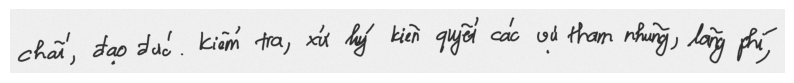

---------------------------------------------------------------------------------------------

Folder: 254 | Image: 6.jpg | CER: 0.00%
✅ Ground-truth: Biển có vùng nội thủy, lãnh hải, vùng đặc quyền kinh tế và thềm lục địa với
🤖 Prediction  : Biển có vùng nội thủy, lãnh hải, vùng đặc quyền kinh tế và thềm lục địa với


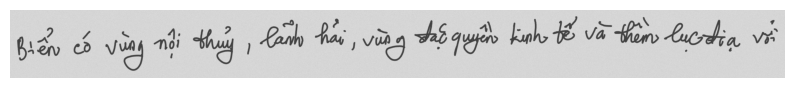

---------------------------------------------------------------------------------------------

Folder: 254 | Image: 5.jpg | CER: 0.00%
✅ Ground-truth: thì có 1 km bờ biển (trung bình của thế giới là 600 km2 đất liền / 1 km bờ biển).
🤖 Prediction  : thì có 1 km bờ biển (trung bình của thế giới là 600 km2 đất liền / 1 km bờ biển).


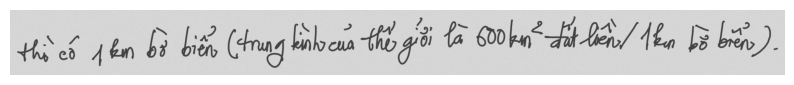

---------------------------------------------------------------------------------------------

Folder: 255 | Image: 19.jpg | CER: 0.00%
✅ Ground-truth: Thành công ấy, liệu có mấy người đạt được?
🤖 Prediction  : Thành công ấy, liệu có mấy người đạt được?


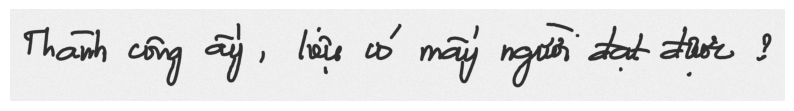

---------------------------------------------------------------------------------------------

Folder: 254 | Image: 9.jpg | CER: 0.00%
✅ Ground-truth: Trong đó có 2 quần đảo Hoàng Sa, Trường Sa và 2.577 đảo lớn, nhỏ,
🤖 Prediction  : Trong đó có 2 quần đảo Hoàng Sa, Trường Sa và 2.577 đảo lớn, nhỏ,


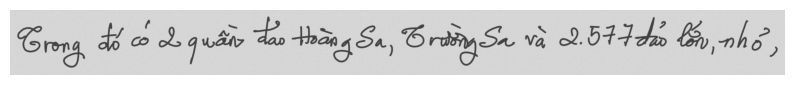

---------------------------------------------------------------------------------------------


In [9]:
# Hiển thị 5 mẫu tốt nhất (CER thấp nhất)
visualize_results(df_results, num_show=5, worst=False)

----- 🚨 Top 5 mẫu tệ nhất (CER cao nhất) -----

Folder: 253 | Image: 36.jpg | CER: 58.46%
✅ Ground-truth: Phải là một câu chuyện đàng hoàng! Nhóm công nhân dũng cảm ấy gồm
🤖 Prediction  : Phân tắc này còn chuyện không khỏe? Khi bạn cũng nhận chuyện cơm ở gần


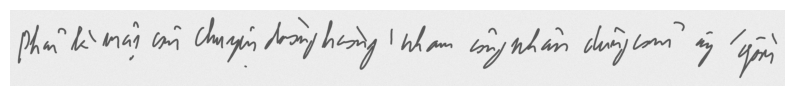

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 13.jpg | CER: 53.85%
✅ Ground-truth: hiệu hiệp sĩ.
🤖 Prediction  : liên hợp ra.


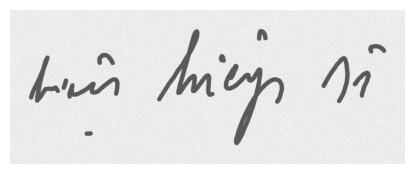

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 40.jpg | CER: 52.00%
✅ Ground-truth: vợ con ly tán, thất nghiệp, lâm vào cảnh đời tan nát như thế sao! Vì sao họ
🤖 Prediction  : vô cơn bồi lồn phải nghiêng, lẫn vào cảnh đấu bom nhà thế họ 70% Việt


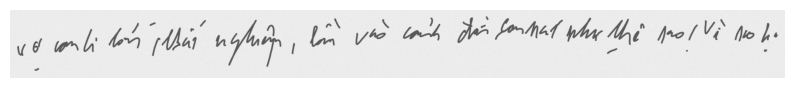

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 41.jpg | CER: 51.56%
✅ Ground-truth: đã làm điều đó? Ba năm trôi qua, chắc hẳn đã hàng trăm, ngàn lần
🤖 Prediction  : để bán được thợ Ba năm tận nạn, Chết Hải đã hãy đảm nộp hồ


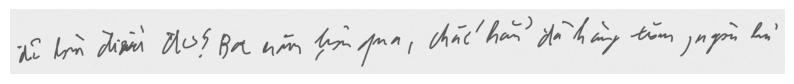

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 16.jpg | CER: 51.28%
✅ Ground-truth: những căn chòi tạm bợ sống qua ngày. Ngẫm sao mà thương thế! Đáng lẽ phải được
🤖 Prediction  : những còn chật toan bộ này gần rằng. Ngồi nơi mới nhưng chứ, đây là phần cháu


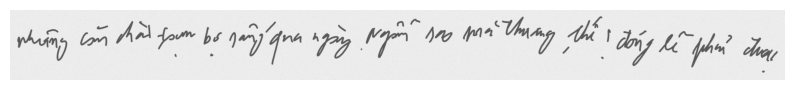

---------------------------------------------------------------------------------------------


In [10]:
# Hiển thị 5 mẫu tệ nhất (CER cao nhất) để phân tích lỗi
visualize_results(df_results, num_show=5, worst=True)